<a href="https://colab.research.google.com/github/Amelghz/Intelligent_Health_Care/blob/master/ParkingH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ultralytics


0: 384x640 28 cars, 1 truck, 91.5ms
Speed: 5.5ms preprocess, 91.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
Largeur  1666
[(        148,          74,    0.088836)]
[(        157,        78.5,    0.094238)]
[(        106,          53,    0.063625)]
[(        151,        75.5,    0.090636)]
[(        103,        51.5,    0.061825)]
[(        100,          50,    0.060024)]
[(        209,       104.5,     0.12545)]
[(        248,         124,     0.14886)]
[(        245,       122.5,     0.14706)]
[(        211,       105.5,     0.12665)]
[(        111,        55.5,    0.066627)]
[(        111,        55.5,    0.066627)]
[(         99,        49.5,    0.059424)]
[(        102,          51,    0.061224)]
[(        110,          55,    0.066026)]
[(         77,        38.5,    0.046218)]
[(        139,        69.5,    0.083433)]
[(        103,        51.5,    0.061825)]
[(         61,        30.5,    0.036615)]
[(         96,          48,    0.057623)]
[(        15

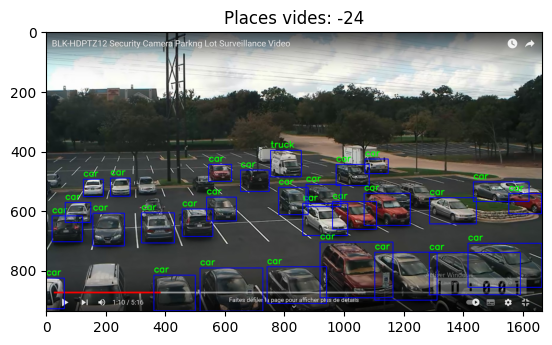


0: 384x640 1 person, 35 cars, 1 bus, 3 trucks, 108.8ms
Speed: 2.2ms preprocess, 108.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
Largeur  1666
[(        198,          99,     0.11885)]
[(        152,          76,    0.091236)]
[(        214,         107,     0.12845)]
[(        217,       108.5,     0.13025)]
[(        142,          71,    0.085234)]
[(        244,         122,     0.14646)]
[(        107,        53.5,    0.064226)]
[(        108,          54,    0.064826)]
[(        130,          65,    0.078031)]
[(        181,        90.5,     0.10864)]
[(        100,          50,    0.060024)]
[(        156,          78,    0.093637)]
[(        193,        96.5,     0.11585)]
[(         62,          31,    0.037215)]
[(        283,       141.5,     0.16987)]
[(        249,       124.5,     0.14946)]
[(         34,          17,    0.020408)]
[(         77,        38.5,    0.046218)]
[(        151,        75.5,    0.090636)]
[(        111,        55.5,    0.0

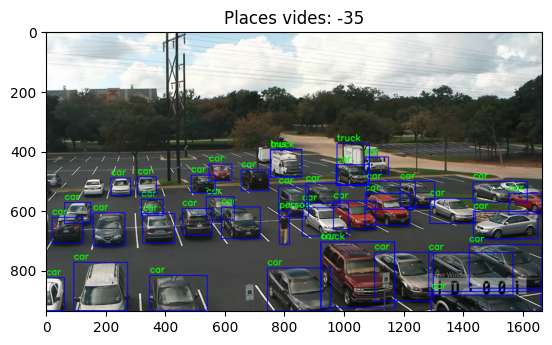


0: 384x640 33 cars, 1 bus, 1 truck, 104.6ms
Speed: 1.9ms preprocess, 104.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)
Largeur  1666
[(        194,          97,     0.11645)]
[(        158,          79,    0.094838)]
[(        243,       121.5,     0.14586)]
[(        143,        71.5,    0.085834)]
[(        230,         115,     0.13806)]
[(        106,          53,    0.063625)]
[(        110,          55,    0.066026)]
[(        208,         104,     0.12485)]
[(        110,          55,    0.066026)]
[(        151,        75.5,    0.090636)]
[(        292,         146,     0.17527)]
[(        179,        89.5,     0.10744)]
[(        149,        74.5,    0.089436)]
[(        104,          52,    0.062425)]
[(        100,          50,    0.060024)]
[(        248,         124,     0.14886)]
[(         63,        31.5,    0.037815)]
[(        119,        59.5,    0.071429)]
[(        110,          55,    0.066026)]
[(         78,          39,    0.046819)]
[( 

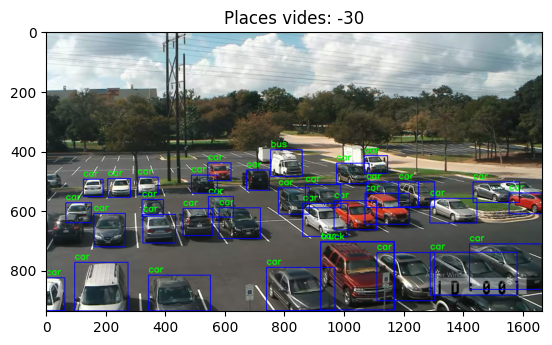

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import cv2
model = YOLO("yolov8n.pt")
image_files = ["v01.jpg", "v02.jpg", "v03.jpg"]
for image_file in image_files:
    image = cv2.imread(image_file)

    results = model.predict(image)

    total_parking_spots = 5
    largeur = max(image.shape[0], image.shape[1])
    print("Largeur ", largeur)

    for i,box in enumerate(results[0].boxes.data):
        x, y, w, h = box[:4]
        image = cv2.rectangle(image, (int(x), int(y)), (int(w), int(h)), (255, 0, 0), 2)

        width = int(w) - int(x)
        centre = width / 2
        pos = width / largeur

        data = np.array([(width, centre, pos)], dtype=[('Width', float), ('Centre', float), ('Position', float)])
        print(data)

        label = model.names[int(box[5])]


        font_size = 1.0
        font_thickness = 2
        font_color = (0, 255, 0)

        cv2.putText(image, label, (int(x), int(y) - 10), cv2.FONT_HERSHEY_SIMPLEX, font_size, font_color, font_thickness, cv2.LINE_AA)

    num_objects = len(results[0].boxes.data)

    num_empty_spots = total_parking_spots - num_objects

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Places vides: {num_empty_spots}")
    plt.show()


0: 384x640 28 cars, 1 truck, 107.9ms
Speed: 3.6ms preprocess, 107.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


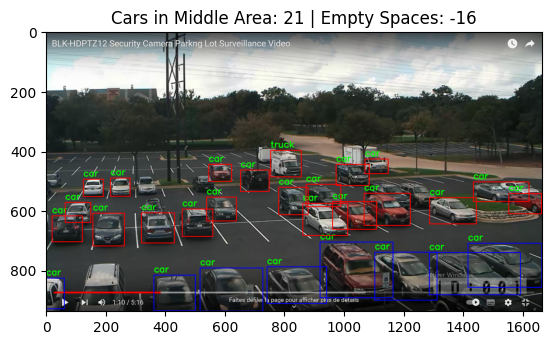


0: 384x640 1 person, 35 cars, 1 bus, 3 trucks, 94.5ms
Speed: 2.0ms preprocess, 94.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


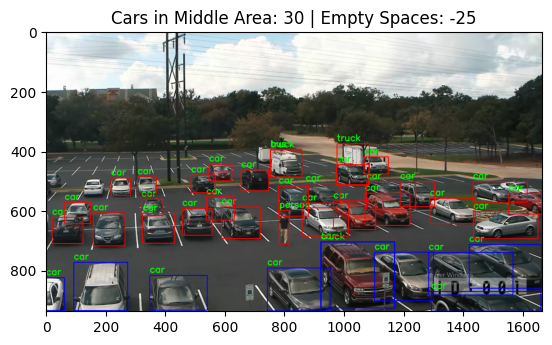


0: 384x640 33 cars, 1 bus, 1 truck, 118.3ms
Speed: 2.1ms preprocess, 118.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


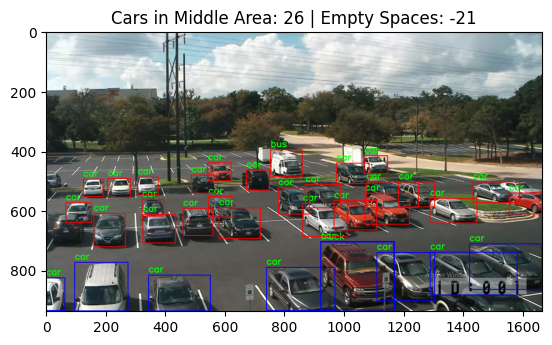

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np
import cv2

model = YOLO("yolov8n.pt")
image_files = ["v01.jpg", "v02.jpg", "v03.jpg"]

# Define the vertical range for the middle area
top_boundary = 625
bottom_boundary = 650

for image_file in image_files:
    image = cv2.imread(image_file)

    results = model.predict(image)

    total_parking_spots = 5  # Update with the total number of parking spots
    num_detected_cars = 0
    cars_in_middle_area = []

    for i, box in enumerate(results[0].boxes.data):
        x, y, w, h = box[:4]
        label = model.names[int(box[5])]

        # Check if the bottom of the detected object (car) is within the specified vertical range
        if y + h >= top_boundary and y <= bottom_boundary:
            cars_in_middle_area.append((x, y, w, h))
            num_detected_cars += 1

        # Draw rectangles and labels for all detected objects
        image = cv2.rectangle(image, (int(x), int(y)), (int(w), int(h)), (255, 0, 0), 2)
        cv2.putText(image, label, (int(x), int(y) - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2, cv2.LINE_AA)

    num_empty_spots = total_parking_spots - num_detected_cars

    # Visualize cars and empty spaces
    for car in cars_in_middle_area:
        x, y, w, h = car
        image = cv2.rectangle(image, (int(x), int(y)), (int(w), int(h)), (0, 0, 255), 2)

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Cars in Middle Area: {num_detected_cars} | Empty Spaces: {num_empty_spots}")
    plt.show()



0: 96x640 9 cars, 1 truck, 83.7ms
Speed: 0.8ms preprocess, 83.7ms inference, 0.8ms postprocess per image at shape (1, 3, 96, 640)
Largeur  1666
[(        192,          96,     0.11525)]
[(        241,       120.5,     0.14466)]
[(        304,         152,     0.18247)]
[(        243,       121.5,     0.14586)]
[(        244,         122,     0.14646)]
[(        221,       110.5,     0.13265)]
[(        183,        91.5,     0.10984)]
[(         62,          31,    0.037215)]
[(        248,         124,     0.14886)]
[(        158,          79,    0.094838)]


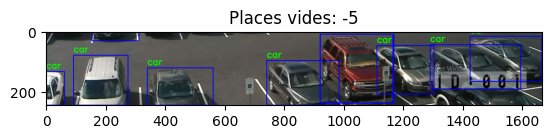

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np
import cv2

model = YOLO("yolov8n.pt")
image_file = "v04.jpg"  # Specify the path to the image you want to process

image = cv2.imread(image_file)
results = model.predict(image)

total_parking_spots = 5
largeur = max(image.shape[0], image.shape[1])
print("Largeur ", largeur)

for i, box in enumerate(results[0].boxes.data):
    x, y, w, h = box[:4]
    image = cv2.rectangle(image, (int(x), int(y)), (int(w), int(h)), (255, 0, 0), 2)

    width = int(w) - int(x)
    centre = width / 2
    pos = width / largeur

    data = np.array([(width, centre, pos)], dtype=[('Width', float), ('Centre', float), ('Position', float)])
    print(data)

    label = model.names[int(box[5])]

    font_size = 1.0
    font_thickness = 2
    font_color = (0, 255, 0)

    cv2.putText(image, label, (int(x), int(y) - 10), cv2.FONT_HERSHEY_SIMPLEX, font_size, font_color, font_thickness, cv2.LINE_AA)

num_objects = len(results[0].boxes.data)
num_empty_spots = total_parking_spots - num_objects

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(f"Places vides: {num_empty_spots}")
plt.show()



0: 96x640 9 cars, 1 truck, 50.0ms
Speed: 0.8ms preprocess, 50.0ms inference, 1.0ms postprocess per image at shape (1, 3, 96, 640)
Largeur  1666
[(        192,          96,     0.11525)]
[(        241,       120.5,     0.14466)]
[(        304,         152,     0.18247)]
[(        243,       121.5,     0.14586)]
[(        244,         122,     0.14646)]
[(        221,       110.5,     0.13265)]
[(        183,        91.5,     0.10984)]
[(         62,          31,    0.037215)]
[(        248,         124,     0.14886)]
[(        158,          79,    0.094838)]
Positions of empty available spaces: []


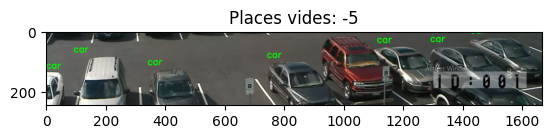

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np
import cv2

model = YOLO("yolov8n.pt")
image_file = "v04.jpg"  # Specify the path to the image you want to process

image = cv2.imread(image_file)
results = model.predict(image)

total_parking_spots = 5
largeur = max(image.shape[0], image.shape[1])
print("Largeur ", largeur)

car_positions = []
available_space_positions = []

for i, box in enumerate(results[0].boxes.data):
    x, y, w, h = box[:4]

    width = int(w) - int(x)
    centre = width / 2
    pos = width / largeur

    data = np.array([(width, centre, pos)], dtype=[('Width', float), ('Centre', float), ('Position', float)])
    print(data)

    label = model.names[int(box[5])]

    # Store car positions
    car_positions.append((x, y, w, h))

    font_size = 1.0
    font_thickness = 2
    font_color = (0, 255, 0)

    cv2.putText(image, label, (int(x), int(y) - 10), cv2.FONT_HERSHEY_SIMPLEX, font_size, font_color, font_thickness, cv2.LINE_AA)

num_objects = len(results[0].boxes.data)
num_empty_spots = total_parking_spots - num_objects

# Generate available space positions
if num_empty_spots > 0:
    # Assuming any spot without a detected car is an available space
    for spot in range(total_parking_spots - num_objects):
        available_space_positions.append(f"Space {spot + 1}")

# Show the positions of empty available spaces
print("Positions of empty available spaces:", available_space_positions)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(f"Places vides: {num_empty_spots}")
plt.show()



0: 96x640 9 cars, 1 truck, 37.6ms
Speed: 0.8ms preprocess, 37.6ms inference, 0.8ms postprocess per image at shape (1, 3, 96, 640)
Largeur  1666
[(        192,          96,     0.11525)]
[(        241,       120.5,     0.14466)]
[(        304,         152,     0.18247)]
[(        243,       121.5,     0.14586)]
[(        244,         122,     0.14646)]
[(        221,       110.5,     0.13265)]
[(        183,        91.5,     0.10984)]
[(         62,          31,    0.037215)]
[(        248,         124,     0.14886)]
[(        158,          79,    0.094838)]
Positions of empty available spaces: []


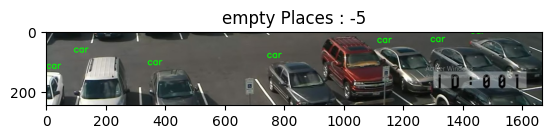

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np
import cv2

model = YOLO("yolov8n.pt")
image_file = "v04.jpg"  # Specify the path to the image you want to process

image = cv2.imread(image_file)
results = model.predict(image)

total_parking_spots = 5
largeur = max(image.shape[0], image.shape[1])
print("Largeur ", largeur)

car_positions = []
available_space_positions = []

for i, box in enumerate(results[0].boxes.data):
    x, y, w, h = box[:4]

    width = int(w) - int(x)
    centre = width / 2
    pos = width / largeur

    data = np.array([(width, centre, pos)], dtype=[('Width', float), ('Centre', float), ('Position', float)])
    print(data)

    label = model.names[int(box[5])]

    # Store car positions
    car_positions.append((x, y, w, h))

    font_size = 1.0
    font_thickness = 2
    font_color = (0, 255, 0)

    cv2.putText(image, label, (int(x), int(y) - 10), cv2.FONT_HERSHEY_SIMPLEX, font_size, font_color, font_thickness, cv2.LINE_AA)

num_objects = len(results[0].boxes.data)
num_empty_spots = total_parking_spots - num_objects

# Generate available space positions
if num_empty_spots > 0:
    # Assuming any spot without a detected car is an available space
    for spot in range(num_empty_spots):
        available_space_positions.append((100 + spot * 50, 100 + spot * 50, 150 + spot * 50, 150 + spot * 50))  # Adjust these values according to where you want to place the markers

# Show the positions of empty available spaces
print("Positions of empty available spaces:", available_space_positions)

# Draw rectangles for available spaces on the image
for space_pos in available_space_positions:
    x, y, w, h = space_pos
    cv2.rectangle(image, (int(x), int(y)), (int(w), int(h)), (0, 255, 0), 2)  # Green rectangles for available spaces

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(f"empty Places : {num_empty_spots}")
plt.show()
